# LQ earnings vs LQ house price vs waiting List

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score
from scipy.signal import correlate
from sklearn import preprocessing

In [4]:
waiting = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=0, skiprows = 1)
price = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=1, skiprows = 1)
earnings = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=2, skiprows = 1)
ratio = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=3, skiprows = 1)
homeless = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=5, skiprows = 1)
householdPop = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=7, skiprows = 1)
socialLet = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=8, skiprows = 1)

merged = pd.read_excel (r"Data/waiting_LQ_data.xlsx", sheet_name=4)

homeless = homeless.drop(homeless.iloc[:,2:6], axis=1)
waiting = waiting.drop(waiting.iloc[:,2:17], axis=1)
merged = merged.drop(merged.iloc[:, 0:1], axis=1)


## Graphs

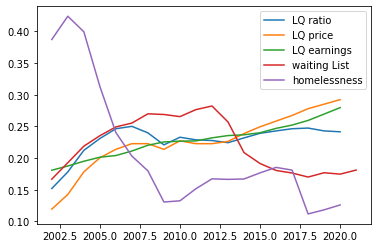

In [5]:
# plot normalised LQ price vs LQ earnings vs LQ ratio vs waiting List
priceCol = list(price.iloc[0])[2:]
price_norm = preprocessing.normalize([priceCol])[0]
waitingCol = list(waiting.iloc[0])[2:]
waiting_norm = preprocessing.normalize([waitingCol])[0]
ratioCol = list(ratio.iloc[0])[2:]
ratio_norm = preprocessing.normalize([ratioCol])[0]
earningsCol = list(earnings.iloc[0])[2:]
earnings_norm = preprocessing.normalize([earningsCol])[0]
homelessCol = list(homeless.iloc[0])[2:]
homeless_norm = preprocessing.normalize([homelessCol])[0]

plt.plot(list(ratio.columns)[2:], ratio_norm, label = "LQ ratio")
plt.plot(list(price.columns)[2:], price_norm, label = "LQ price")
plt.plot(list(earnings.columns)[2:], earnings_norm, label = "LQ earnings")
plt.plot(list(waiting.columns)[2:], waiting_norm, label = "waiting List")
plt.plot(list(homeless.columns)[2:], homeless_norm, label = "homelessness")

plt.legend()

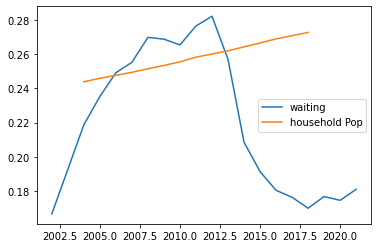

In [6]:
# plot normalised waiting List vs household population ;-;
householdCol = list(householdPop.iloc[0])[2:]
household_norm = preprocessing.normalize([householdCol])[0]

plt.plot(list(waiting.columns)[2:], waiting_norm, label = "waiting")
plt.plot(list(householdPop.columns)[2:], household_norm, label = "household Pop")

plt.legend()

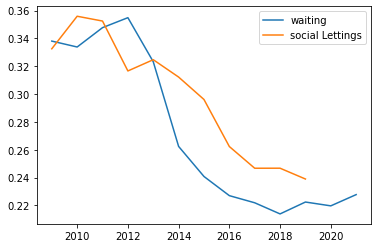

In [7]:
# plot normalised waiting List vs social Lettings
waitingCol = list(waiting.iloc[0])[9:]
waiting_norm = preprocessing.normalize([waitingCol])[0]
socialLetCol = list(socialLet.iloc[0])[2:]
socialLet_norm = preprocessing.normalize([socialLetCol])[0]

plt.plot(list(waiting.columns)[9:], waiting_norm, label = "waiting")
plt.plot(list(socialLet.columns)[2:], socialLet_norm, label = "social Lettings")

plt.legend()

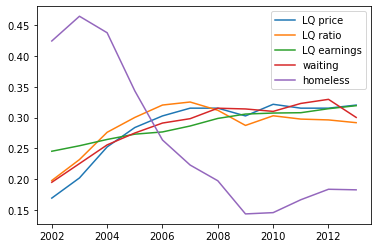

In [8]:
# plot normalised LQ price vs LQ earnings vs LQ ratio vs waiting List for correlated timescale only
endIndex = 14 # until 2013 inc.
priceCol = list(price.iloc[0])[2:endIndex]
price_norm = preprocessing.normalize([priceCol])[0]
waitingCol = list(waiting.iloc[0])[2:endIndex]
waiting_norm = preprocessing.normalize([waitingCol])[0]
ratioCol = list(ratio.iloc[0])[2:endIndex]
ratio_norm = preprocessing.normalize([ratioCol])[0]
earningsCol = list(earnings.iloc[0])[2:endIndex]
earnings_norm = preprocessing.normalize([earningsCol])[0]
homelessCol = list(homeless.iloc[0])[2:endIndex]
homeless_norm = preprocessing.normalize([homelessCol])[0]

plt.plot(list(price.columns)[2:endIndex], price_norm, label = "LQ price")
plt.plot(list(ratio.columns)[2:endIndex], ratio_norm, label = "LQ ratio")
plt.plot(list(earnings.columns)[2:endIndex], earnings_norm, label = "LQ earnings")
plt.plot(list(waiting.columns)[2:endIndex], waiting_norm, label = "waiting")
plt.plot(list(homeless.columns)[2:endIndex], homeless_norm, label = "homeless")


plt.legend()

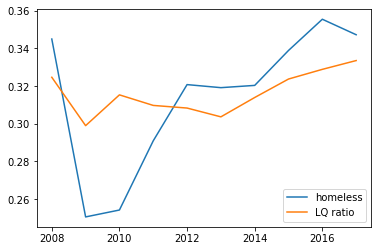

In [9]:
# 2008 to 2017
endIndex = 18
startIndex = 8
homelessCol = list(homeless.iloc[0])[startIndex:endIndex]
homeless_norm = preprocessing.normalize([homelessCol])[0]
ratioCol = list(ratio.iloc[0])[startIndex:endIndex]
ratio_norm = preprocessing.normalize([ratioCol])[0]

plt.plot(list(homeless.columns)[startIndex:endIndex], homeless_norm, label = "homeless")
plt.plot(list(ratio.columns)[startIndex:endIndex], ratio_norm, label = "LQ ratio")


plt.legend()

## Pearson's r value

### All data


In [10]:
# pearson's r computed using Pandas and Scipy between LQ price and waiting
overall_pearson_r = merged.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged['waiting'].dropna(), merged['price'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

waitingList = list(waiting.iloc[0])[2:21]
priceList = list(price.iloc[0])[2:]
r2_score(waitingList, priceList)

Pandas computed Pearson r: -0.17580727993750206
Scipy computed Pearson r: -0.17580727993750167 and p-value: 0.4715629326578455


-24.388380126718943

In [11]:
# pearson's r computed using Pandas and Scipy between LQ price and homelessness
overall_pearson_r = merged.corr().iloc[1, 2]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged['homeless'].dropna(), merged['price'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: -0.8486133625290544
Scipy computed Pearson r: -0.8486133625290544 and p-value: 4.385797162589363e-06


In [12]:
# pearson's r computed using Pandas and Scipy between LQ earnings and waiting
overall_pearson_r = merged.corr().iloc[0,4]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged['waiting'].dropna(), merged['earning'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: -0.29570092746995713
Scipy computed Pearson r: -0.29570092746995696 and p-value: 0.2190176134774588


In [13]:
# pearson's r computed using Pandas and Scipy between LQ earnings and homelessness
overall_pearson_r = merged.corr().iloc[2, 4]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged['homeless'].dropna(), merged['earning'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: -0.8276877288642914
Scipy computed Pearson r: -0.8276877288642914 and p-value: 1.2227217393989705e-05


In [14]:
# pearson's r computed using Pandas and Scipy between LQ ratio and waiting
overall_pearson_r = merged.corr().iloc[0,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged['waiting'].dropna(), merged['ratio'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: 0.16814095583572222
Scipy computed Pearson r: 0.16814095583572242 and p-value: 0.4914043755753345


In [15]:
# pearson's r computed using Pandas and Scipy between homelessness and LQ ratio
overall_pearson_r = merged.corr().iloc[2,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged['homeless'].dropna(), merged['ratio'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: -0.735535312503462
Scipy computed Pearson r: -0.7355353125034622 and p-value: 0.0003321133903518842


### Correlated Data only

In [16]:
# pearson's r computed using Pandas and Scipy for correlated timescale only between LQ price and waiting (up to 2013 inc.)
merged2 = merged.drop(merged.index[range(12,19)])
overall_pearson_r = merged2.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2['waiting'].dropna(), merged2['price'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

waitingList = list(waiting.iloc[0])[2:14]
priceList = list(price.iloc[0])[2:14]

r2_score(waitingList, priceList, multioutput='variance_weighted')


Pandas computed Pearson r: 0.9635238967572635
Scipy computed Pearson r: 0.9635238967572637 and p-value: 4.783056776311768e-07


-44.582397837723164

In [17]:
# LQ price and homelessness
merged2 = merged.drop(merged.index[range(12,19)])
overall_pearson_r = merged2.corr().iloc[1,2]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2['homeless'].dropna(), merged2['price'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: -0.8782778347853998
Scipy computed Pearson r: -0.8782778347853999 and p-value: 0.00017096006368653958


In [15]:
#  pearson's r computed using Pandas and Scipy for correlated timescale only between LQ earnings and waiting (up to 2013 inc.)
merged2 = merged.drop(merged.index[range(12,19)])
overall_pearson_r = merged2.corr().iloc[0,4]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2['waiting'].dropna(), merged2['earning'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: 0.9165265813448494
Scipy computed Pearson r: 0.9165265813448494 and p-value: 2.7707215017080855e-05


In [16]:
# pearson's r computed using Pandas and Scipy for correlated timescale only between LQ ratio and waiting
merged2 = merged.drop(merged.index[range(12,19)])
overall_pearson_r = merged2.corr().iloc[0,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2['waiting'].dropna(), merged2['ratio'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: 0.8490424828204247
Scipy computed Pearson r: 0.8490424828204246 and p-value: 0.00047644005691794764


In [17]:
# pearson's r computed using Pandas and Scipy for correlated timescale only between social lettings and waiting
merged2 = merged.drop(merged.index[range(0,5)])
merged2 = merged2.drop(merged2.index[range(13,15)])

overall_pearson_r = merged2.corr().iloc[0,7]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2['waiting'].dropna(), merged2['social Lettings'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: 0.9140871463460684
Scipy computed Pearson r: 0.9140871463460682 and p-value: 1.2363226436099351e-05


In [18]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ price and waiting (2014 inc. onwards)
merged2 = merged.drop(merged.index[range(0,12)])
overall_pearson_r = merged2.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2['waiting'].dropna(), merged2['price'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: -0.8525510148921739
Scipy computed Pearson r: -0.8525510148921741 and p-value: 0.014786368366468176


In [19]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ earnings and waiting (2014 inc. onwards)
merged2 = merged.drop(merged.index[range(0,12)])
overall_pearson_r = merged2.corr().iloc[0,4]

print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2['waiting'].dropna(), merged2['earning'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: -0.7297559465622604
Scipy computed Pearson r: -0.7297559465622601 and p-value: 0.06264546761091616


In [20]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ ratio and waiting (2014 inc. onwards)
merged2 = merged.drop(merged.index[range(0,12)])
overall_pearson_r = merged2.corr().iloc[0,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2['waiting'].dropna(), merged2['ratio'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: -0.9424709052269229
Scipy computed Pearson r: -0.9424709052269236 and p-value: 0.0014779340424424944


In [21]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ ratio and homelessness 
# 2008 to 2017 inc. 
merged2 = merged.drop(merged.index[range(0,6)])
merged2 = merged2.drop(merged2.index[range(10,13)])

# display(merged2)
overall_pearson_r = merged2.corr().iloc[2,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2['homeless'].dropna(), merged2['ratio'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Pandas computed Pearson r: 0.7104449079065572
Scipy computed Pearson r: 0.7104449079065571 and p-value: 0.021304001059835907


In [23]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ ratio and homelessness 
# 2008 to 2017 inc. 
merged2 = merged.drop(merged.index[range(0,6)])
merged2 = merged2.drop(merged2.index[range(10,13)])

# display(merged2)
overall_pearson_r = merged2.corr().iloc[2,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2['homeless'].dropna(), merged2['earning'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: 0.7104449079065572
Scipy computed Pearson r: 0.5927193118441039 and p-value: 0.07094895759937322


In [24]:
# pearson's r computed using Pandas and Scipy for -ve correlated timescale only between LQ ratio and homelessness 
# 2008 to 2017 inc. 
merged2 = merged.drop(merged.index[range(0,6)])
merged2 = merged2.drop(merged2.index[range(10,13)])

# display(merged2)
overall_pearson_r = merged2.corr().iloc[2,3]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(merged2['homeless'].dropna(), merged2['price'].dropna())
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


Pandas computed Pearson r: 0.7104449079065572
Scipy computed Pearson r: 0.6684265737848762 and p-value: 0.034609261589357794
